<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/NueralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [274]:
def initialise_weights(nueron_layers):
  weight_list = []
  biases = []
  for i in range(len(nueron_layers)-1):
    weight_list.append(np.random.randn(nueron_layers[i],nueron_layers[i+1]))
    biases.append(np.random.randn(1,nueron_layers[i+1]))
  
  return weight_list,biases

def sigmoid(z):
  return 1/(1+np.exp(-z))

def det_sigmoid(z):
  return (np.exp(-z)/(1+np.exp(-z))**2)

def tanh(z):
  return (np.exp(z)-np.exp(-z))/(np.exp(-z)+np.exp(z))

def det_tanh(z):
  return 1-(tanh(z))**2

def relu(z):
  return max(0,z)

def det_relu(z):
  return (z>0)

def leaky_relu(z,c=0.01):
  return max(c*z,z)

def det_leaky_relu(z,c=0.01):
  return (z>0)*1 + (z<=0)*c

function_dict = {'sig':sigmoid,'dsig':det_sigmoid,'tanh':tanh,'dtanh':det_tanh,'relu':relu,'drelu':det_relu,'lrelu':leaky_relu,'dlrelu':det_leaky_relu}

def forward_propogation(activations,input,weight_list,biases):
  x = np.reshape(np.array(input),(1,len(input)))
  a = [x]
  z = [1]
  for i,weight in enumerate(weight_list):
    x = np.matmul(x,weight) + biases[i]
    z.append(x)
    x = function_dict[activations[i]](x)
    a.append(x)
  return z,a

def loss_function(predicted,expected):
  return -1*np.sum(np.multiply(expected,np.log(predicted))+np.multiply(1-expected,np.log(1-predicted)))/3

def backpropogation(activations,weight_list,biases,z,a,expected,lr):

  #dz = a[-1] - expected
  dz = ((1-expected)/(1-a[-1]) - expected/a[-1])*function_dict['d'+activations[-1]](z[-1])

  for i in range(2,len(a)+1):
    dw = np.matmul(a[-i].T,dz)
    weight_list[1-i] = weight_list[1-i] - lr*dw
    biases[1-i] = biases[1-i] - lr*dz
    #print(weight_list[1-i].shape)
    dz = np.matmul(dz,weight_list[1-i].T)*function_dict['d'+activations[-i]](z[-i])

def training(activations,weight_list,biases,input,expected,lr):
  l = len(expected)
  expected = np.reshape(expected,(1,l))
  z,a = forward_propogation(activations,input,weight_list,biases)
  backpropogation(activations,weight_list,biases,z,a,expected,lr)
  return loss_function(a[-1],expected)

#bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
#print(bce([[1.0,0.0,1.0]],predicted))

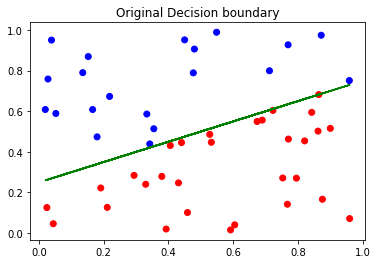

In [275]:
boundary = [0.5,-1,0.25]

def createDataset(theta=[0.5,-1,0.25],n=100):
  X=[]
  Y=[]
  for i in range(n):
    X.append([np.random.rand(), np.random.rand()])
    if X[-1][0]*theta[0] + X[-1][1]*theta[1] + theta[2]>=0:
      Y.append([1])
    else:
      Y.append([0])
  return X,Y

def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i[0]==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

X_t,Y_t = createDataset(boundary,50)
plt.title('Original Decision boundary')
visualize_dataset_with_basis(X_t,Y_t,boundary)

def accuracy(activations,X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(activations,input,weight_list,biases)
    if (a[-1][0]>=0.5)==Y_t[i][0]:
      correct+=1
  return correct/len(X_t)

In [276]:
print(X_t[:5])
print(Y_t[:5])

[[0.4499594005518074, 0.9515440053087604], [0.8621893030590964, 0.5022617303470349], [0.7227955357239152, 0.6041829247932313], [0.02430927669704952, 0.12574909965600445], [0.3296413741094386, 0.2405286064329536]]
[[0], [1], [1], [1], [1]]


In [277]:
nueron_layers = [2,4,1] #list(map(int,input('Enter layer-wise nuerons').strip().split()))
activations = ['sig','sig','sig']

def complete_training(nueron_layers,activations,X_t,Y_t,epochs=20,lr=0.1):
  weight_list,biases = initialise_weights(nueron_layers)
  lossTotal = []
  for i in range(epochs):
    loss = 0
    for i in range(len(X_t)):
      input = X_t[i]
      expected = Y_t[i]
      loss += training(activations,weight_list,biases,input,expected,lr)
    lossTotal.append(loss/len(X_t))
  acc = accuracy(activations,X_t,Y_t,weight_list,biases)
  plt.plot(list(range(len(lossTotal))),lossTotal)
  plt.show()
  return weight_list,biases,'\n\nAccuracy : '+str(acc)

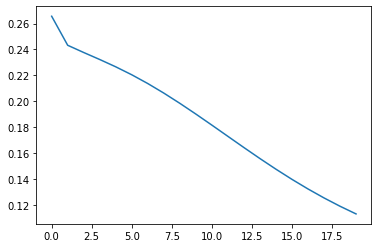



Accuracy : 0.96


In [278]:
weight_list,biases,acc = complete_training(nueron_layers,activations,X_t,Y_t,epochs=20,lr=0.1)
print(acc)

In [279]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])
df = shuffle(df)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,5.7,2.5,5.0,2.0,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
134,6.1,2.6,5.6,1.4,Iris-virginica


In [280]:
df1 = pd.get_dummies(df['Species'])
df = df.drop(columns=['Species'])
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.944444,0.333333,0.966102,0.791667
1,0.194444,0.125000,0.389831,0.375000
2,0.333333,0.125000,0.508475,0.500000
3,0.083333,0.500000,0.067797,0.041667
4,0.222222,0.625000,0.067797,0.041667


In [281]:
X = df.values.tolist()
print(X[:5])
Y = df1.values.tolist()
print(Y[:5])

[[0.9444444444444442, 0.33333333333333326, 0.9661016949152543, 0.7916666666666667], [0.19444444444444442, 0.12499999999999989, 0.38983050847457623, 0.375], [0.33333333333333326, 0.12499999999999989, 0.5084745762711864, 0.5000000000000001], [0.08333333333333326, 0.5, 0.06779661016949151, 0.04166666666666667], [0.2222222222222221, 0.625, 0.06779661016949151, 0.04166666666666667]]
[[0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]


In [282]:
def accuracy(activations,X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(activations,input,weight_list,biases)
    if np.argmax(a[-1])==np.argmax(Y_t[i]):
      correct+=1
  return correct/len(X_t)

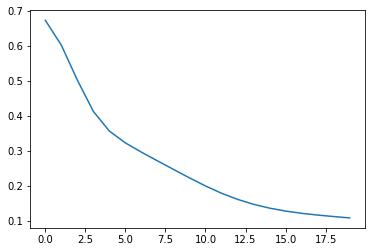



Accuracy : 0.952


In [283]:
nueron_layers = [4,16,8,3]
activations = ['sig','sig','sig','sig']
weight_list,biases,acc = complete_training(nueron_layers,activations,X[:125],Y[:125],epochs=20,lr=0.1)
print(acc)

In [285]:
accuracy(activations,X[125:],Y[125:],weight_list,biases)

0.96